# Ensemble Methods - Demo Project
------------------

 * Voting Classifiers
    * Soft Voting
    * Hard Voting
 * Bagging and Pasting
    * Random Forests with Out of Bag evaluation
 * Boosting
    * AdaBoost
    * Gradient Boosting
 * Stacking


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Plotting parameters
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,10)

In [18]:
from sklearn.datasets import make_moons

In [217]:
X,y = make_moons(n_samples=1000,noise=0.4,shuffle=True,random_state=7)

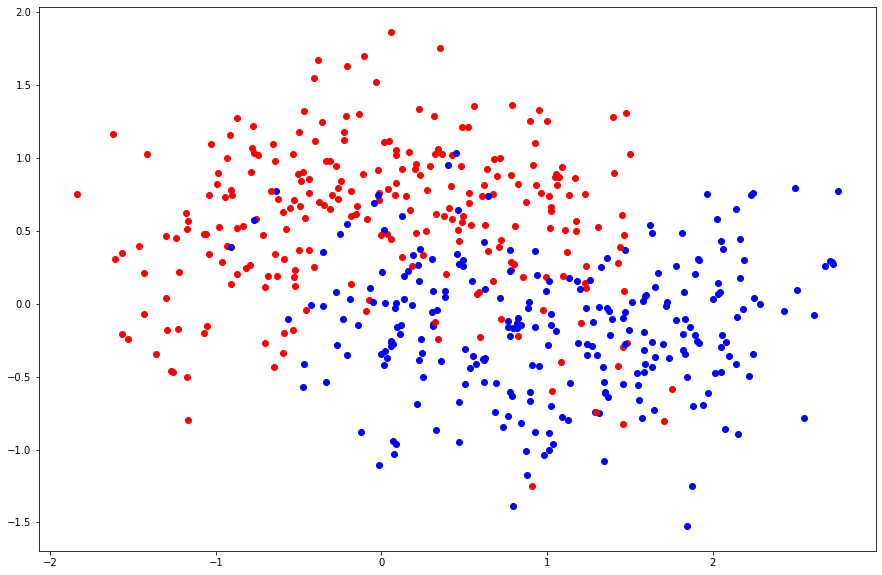

In [187]:
colors = {0:'red',1:'blue'}

for i in range(len(X)):
    plt.scatter(X[i,0],X[i,1],label=y[i],color=colors[y[i]])

In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=42)

In [219]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


## Baseline Classifiers

In [220]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [227]:
knn_clf = KNeighborsClassifier()
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(kernel='rbf',probability=True)

classifiers = [knn_clf,log_clf,rnd_clf,svm_clf]

In [228]:
def train_models(classifiers):

    for clf in classifiers:
        clf.fit(X_train,y_train)
        ypred = clf.predict(X_test)

        print(clf.__class__.__name__,accuracy_score(y_test, ypred))

In [229]:
train_models(classifiers)

KNeighborsClassifier 0.845
LogisticRegression 0.8
RandomForestClassifier 0.84
SVC 0.845


## Voting Classifiers

In [230]:
voting_clf = VotingClassifier(
    estimators=[('lr',log_clf),('rf',rnd_clf),('svc',svm_clf)],voting='hard'
)
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('svc', SVC(probability=True))],
                 voting='soft')

In [231]:
clf = classifiers
clf.append(voting_clf)

train_models(clf)

KNeighborsClassifier 0.845
LogisticRegression 0.8
RandomForestClassifier 0.845
SVC 0.845
VotingClassifier 0.85


In [226]:
classifiers

[KNeighborsClassifier(),
 LogisticRegression(),
 RandomForestClassifier(),
 SVC(),
 VotingClassifier(estimators=[('lr', LogisticRegression()),
                              ('rf', RandomForestClassifier()), ('svc', SVC())])]

## Bagging and Pasting

In [232]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [234]:
dsn_tree = DecisionTreeClassifier()
dsn_tree.fit(X_train,y_train)

ypred = dsn_tree.predict(X_test)
accuracy_score(y_test,ypred)

0.83

In [243]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(),n_estimators=1000,
    max_samples=500,bootstrap=True,n_jobs=-1)
bag_clf.fit(X_train,y_train)

ypred = bag_clf.predict(X_test)
accuracy_score(y_test,ypred)

0.845

In [244]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1)
rnd_clf.fit(X_train,y_train)

ypred = rnd_clf.predict(X_test)
accuracy_score(y_test,ypred)

0.85

## Boosting

### AdaBoost

In [255]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=5), n_estimators=500,algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train,y_train)


ypred = ada_clf.predict(X_test)
accuracy_score(y_test,ypred)


0.84

In [257]:
!pip install xgboost

     |████████████████████████████████| 157.5 MB 51 kB/s 


In [284]:
from xgboost import XGBClassifier

xg_clf = XGBClassifier(n_estimators=50,max_depth=100)
xg_clf.fit(X_train,y_train)

ypred = xg_clf.predict(X_test)
accuracy_score(y_test,ypred)

[09:09:45] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.83